In [ ]:
import kagglehub
import mediapipe as mp

path = kagglehub.dataset_download("marusagar/hand-gesture-detection-system")

print("Path to dataset files:", path)

100%|██████████| 1.60G/1.60G [00:17<00:00, 98.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/marusagar/hand-gesture-detection-system/versions/1


In [ ]:

import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/marusagar/hand-gesture-detection-system/versions/1/train.csv', sep =';', names = ['IMAGE_NAME',
          'LABEL',
          'CLASS'])

df

,IMAGE_NAME,LABEL,CLASS
0,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left_Swipe_new,0
1,WIN_20180925_17_18_28_Pro_Left_Swipe_new,Left_Swipe_new,0
2,WIN_20180925_17_18_56_Pro_Left_Swipe_new,Left_Swipe_new,0
3,WIN_20180925_17_19_51_Pro_Left_Swipe_new,Left_Swipe_new,0
4,WIN_20180925_17_20_14_Pro_Left_Swipe_new,Left_Swipe_new,0
...,...,...,...
658,WIN_20180907_16_38_23_Pro_Thumbs Up_new,Thumbs Up_new,4
659,WIN_20180907_16_41_09_Pro_Thumbs Up_new,Thumbs Up_new,4
660,WIN_20180907_16_42_05_Pro_Thumbs Up_new,Thumbs Up_new,4
661,WIN_20180907_16_42_55_Pro_Thumbs Up_new,Thumbs Up_new,4


In [ ]:
df['LABEL'] = df['LABEL'].str.replace('_'," ")
df['LABEL'] = df['LABEL'].str.replace('new',"")
df['LABEL'].value_counts()

,count
LABEL,
Right Swipe,137
Thumbs Down,137
Thumbs Up,123
Left Swipe,96
Stop,93
Left Swipe Left Swipe,40
Stop Gesture,37


In [ ]:
df['LABEL'] = df['LABEL'].str.replace('Left Swipe  Left Swipe ',"Left Swipe ")
df['LABEL'] = df['LABEL'].str.replace('Stop Gesture ',"Stop ")
df['LABEL'].value_counts()

,count
LABEL,
Right Swipe,137
Thumbs Down,137
Left Swipe,136
Stop,130
Thumbs Up,123


In [ ]:
df['CLASS'].value_counts()

,count
CLASS,
1,137
3,137
0,136
2,130
4,123


In [ ]:
df.head()

,IMAGE_NAME,LABEL,CLASS
0,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0
1,WIN_20180925_17_18_28_Pro_Left_Swipe_new,Left Swipe,0
2,WIN_20180925_17_18_56_Pro_Left_Swipe_new,Left Swipe,0
3,WIN_20180925_17_19_51_Pro_Left_Swipe_new,Left Swipe,0
4,WIN_20180925_17_20_14_Pro_Left_Swipe_new,Left Swipe,0


In [ ]:
from pathlib import Path
base_path = Path('/root/.cache/kagglehub/datasets/marusagar/hand-gesture-detection-system/versions/1')
rows = []

for i, row in df.iterrows():
    folder = row['IMAGE_NAME']
    label = row['LABEL']
    class_id = row['CLASS']

    Image_folder = base_path/'train'/'train'/folder

    for image_path in sorted(Image_folder.glob('*.png')):
        rows.append({
            "Image_name": str(image_path),
            'Folder': folder,
            'Label': label,
            'Class': class_id
        })

df_images = pd.DataFrame(rows)

In [ ]:
df_images.head()

,Image_name,Folder,Label,Class
0,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0
1,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0
2,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0
3,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0
4,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0


In [ ]:
df_valid = pd.read_csv('/root/.cache/kagglehub/datasets/marusagar/hand-gesture-detection-system/versions/1/val.csv', sep =';', names = ['IMAGE_NAME',
          'LABEL',
          'CLASS'])

df_valid.head()

,IMAGE_NAME,LABEL,CLASS
0,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left_Swipe_new,0
1,WIN_20180925_17_43_01_Pro_Left_Swipe_new,Left_Swipe_new,0
2,WIN_20180925_18_01_40_Pro_Left_Swipe_new,Left_Swipe_new,0
3,WIN_20180925_18_03_21_Pro_Left_Swipe_new,Left_Swipe_new,0
4,WIN_20180926_16_46_22_Pro_Left_Swipe_new,Left_Swipe_new,0


In [ ]:
df_valid['LABEL'] = df_valid['LABEL'].str.replace('_'," ")
df_valid['LABEL'] = df_valid['LABEL'].str.replace('new',"")
df_valid['LABEL'].value_counts()

,count
LABEL,
Right Swipe,23
Thumbs Down,21
Thumbs Up,16
Stop,14
Left Swipe,13
Stop Gesture,8
Left Swipe Left Swipe,5


In [ ]:
df_valid['LABEL'] = df_valid['LABEL'].str.replace('Left Swipe  Left Swipe ',"Left Swipe ")
df_valid['LABEL'] = df_valid['LABEL'].str.replace('Stop Gesture ',"Stop ")
df_valid['LABEL'].value_counts()

,count
LABEL,
Right Swipe,23
Stop,22
Thumbs Down,21
Left Swipe,18
Thumbs Up,16


In [ ]:
from pathlib import Path
base_path = Path('/root/.cache/kagglehub/datasets/marusagar/hand-gesture-detection-system/versions/1')
rows = []

for i, row in df_valid.iterrows():
    folder = row['IMAGE_NAME']
    label = row['LABEL']
    class_id = row['CLASS']

    Image_folder = base_path/'val'/'val'/folder

    for image_path in sorted(Image_folder.glob('*.png')):
        rows.append({
            "Image_name": str(image_path),
            'Folder': folder,
            'Label': label,
            'Class': class_id
        })

df_images_validation = pd.DataFrame(rows)


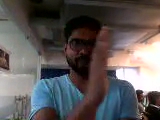

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open(df_images_validation['Image_name'][110])
image

In [ ]:
import mediapipe as mp
hands = mp.solutions.hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5
)

print(hands)


In [ ]:
def extract_landmarks(result):
    if result.multi_hand_landmarks:
        hand_landmarks = result.multi_hand_landmarks[0]
        landmarks_ = []
        for lm in hand_landmarks.landmark:
            landmarks_.extend([lm.x,lm.y,lm.z])
        return np.array(landmarks_)
    return None


In [ ]:
import cv2
import numpy as np

all_landmarks=[]
for i, row in df_images.iterrows():
    current_image_path = Path(row['Image_name'])
    img = cv2.imread(str(current_image_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results_hand = hands.process(img_rgb)
    landmarks = extract_landmarks(results_hand)
    all_landmarks.append(landmarks)

hands.close()
df_images['Landmarks'] = all_landmarks

In [ ]:
df_images['Landmarks'].isnull().sum()

5046

In [ ]:
df_images['Landmarks']

,Landmarks
0,"[0.2936619520187378, 0.841272234916687, 3.4233..."
1,"[0.2639818489551544, 0.7474154829978943, 2.612..."
2,"[0.24935020506381989, 0.699260950088501, 2.263..."
3,"[0.2188805341720581, 0.6597063541412354, 2.066..."
4,"[0.21474401652812958, 0.6442283987998962, 2.10..."
...,...
19885,None
19886,None
19887,None
19888,None


In [ ]:
df_images.to_csv('df_images.csv', index=False)

In [ ]:
import mediapipe as mp
hands = mp.solutions.hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5
)

In [ ]:
df_images_validation

,Image_name,Folder,Label,Class
0,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left Swipe,0
1,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left Swipe,0
2,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left Swipe,0
3,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left Swipe,0
4,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left Swipe,0
...,...,...,...,...
2995,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_39_59_Pro_Thumbs Up_new,Thumbs Up,4
2996,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_39_59_Pro_Thumbs Up_new,Thumbs Up,4
2997,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_39_59_Pro_Thumbs Up_new,Thumbs Up,4
2998,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_39_59_Pro_Thumbs Up_new,Thumbs Up,4


In [ ]:
all_landmarks=[]
for i, row in df_images_validation.iterrows():
    current_image_path = Path(row['Image_name'])
    img = cv2.imread(str(current_image_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results_hand = hands.process(img_rgb)
    landmarks = extract_landmarks(results_hand)
    all_landmarks.append(landmarks)
hands.close()
df_images_validation['Landmarks'] = all_landmarks

In [ ]:
df_images_validation['Landmarks'].isnull().sum()


673

In [ ]:
df_images_validation['Landmarks']

,Landmarks
0,"[0.16239437460899353, 0.9535895586013794, 4.85..."
1,"[0.16212080419063568, 0.9526658058166504, 4.63..."
2,"[0.1627872884273529, 0.9527072906494141, 4.465..."
3,"[0.16566835343837738, 0.9507536292076111, 4.77..."
4,"[0.16737321019172668, 0.9481360912322998, 5.09..."
...,...
2995,"[0.4116675853729248, 0.6710432767868042, -1.07..."
2996,"[0.41079816222190857, 0.6614399552345276, -1.0..."
2997,"[0.4115321636199951, 0.6592648029327393, -1.05..."
2998,"[0.4143316447734833, 0.6866970062255859, -1.17..."


In [ ]:
df_images_validation.to_csv('df_valid.csv', index=False)

--------------

In [ ]:
import pandas as pd
df_images = pd.read_csv('df_images.csv')
df_valid = pd.read_csv('df_valid.csv')

print(df_images['Landmarks'].isnull().sum())
print(df_valid['Landmarks'].isnull().sum())

5046
673


In [ ]:
df_images

,Image_name,Folder,Label,Class,Landmarks
0,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.93661952e-01 8.41272235e-01 3.42331418e-...
1,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.63981849e-01 7.47415483e-01 2.61217252e-...
2,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.49350205e-01 6.99260950e-01 2.26344994e-...
3,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.18880534e-01 6.59706354e-01 2.06695077e-...
4,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.14744017e-01 6.44228399e-01 2.10030706e-...
...,...,...,...,...,...
19885,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,NaN
19886,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,NaN
19887,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,NaN
19888,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,NaN


In [ ]:
df_images.dropna(subset=['Landmarks'], inplace=True)
df_valid.dropna(subset=['Landmarks'], inplace=True)

In [ ]:
print(df_images['Landmarks'].isnull().sum())
print(df_valid['Landmarks'].isnull().sum())

0
0


In [ ]:
df_images

,Image_name,Folder,Label,Class,Landmarks
0,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.93661952e-01 8.41272235e-01 3.42331418e-...
1,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.63981849e-01 7.47415483e-01 2.61217252e-...
2,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.49350205e-01 6.99260950e-01 2.26344994e-...
3,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.18880534e-01 6.59706354e-01 2.06695077e-...
4,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.14744017e-01 6.44228399e-01 2.10030706e-...
...,...,...,...,...,...
19876,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 1.43790901e-01 6.71904027e-01 -3.36100697e-...
19877,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 1.11692734e-01 6.76745415e-01 -3.80521072e-...
19878,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 4.43303585e-02 6.45289004e-01 -3.01247780e-...
19879,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 6.51148036e-02 6.75807178e-01 -5.85923146e-...


In [ ]:
df_images.to_csv('df_images_cleaned.csv', index=False)
df_valid.to_csv('df_valid_cleaned.csv', index=False)

In [ ]:
from mediapipe.framework.formats import landmark_pb2
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import pandas as pd

In [ ]:
def plot_landmark(df, index: int):
  selected = df.iloc[index]
  selected_image = selected['Image_name']
  selected_label = selected['Label']
  selected_folder = selected['Folder']
  selected_class = selected['Class']
  selected_landmarks = selected['Landmarks']
  reshaped_landmark = selected_landmarks.reshape(-1,3)
  print(f"Selected image for visualization (Index {selected}): {selected_image}")
  print(f"Associated Label: {selected_label}, Class: {selected_class}, Folder: {selected_folder}")
  print('\n')

  img = cv2.imread(selected_image)
  hand_landmarks_pb = landmark_pb2.NormalizedLandmarkList()
  for i in range(reshaped_landmark.shape[0]):
    landmark = hand_landmarks_pb.landmark.add()
    landmark.x = reshaped_landmark[i, 0]
    landmark.y = reshaped_landmark[i, 1]
    landmark.z = reshaped_landmark[i, 2]
  mp_draw = mp.solutions.drawing_utils
  mp_hands = mp.solutions.hands
  copy_img = img.copy()
  copy_img = cv2.cvtColor(copy_img, cv2.COLOR_BGR2RGB)
  mp_draw.draw_landmarks(
      copy_img,
      hand_landmarks_pb,
      mp_hands.HAND_CONNECTIONS,
      mp_draw.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1),
      mp_draw.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1)
  )

  plt.figure(figsize=(10, 8))
  plt.imshow(copy_img)
  plt.show()

----------------------------------------------

In [ ]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import random


In [ ]:
import numpy as np
import pandas as pd
df_images = pd.read_csv('df_images_cleaned.csv')
df_valid = pd.read_csv('df_valid_cleaned.csv')
df_images

,Image_name,Folder,Label,Class,Landmarks
0,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.93661952e-01 8.41272235e-01 3.42331418e-...
1,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.63981849e-01 7.47415483e-01 2.61217252e-...
2,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.49350205e-01 6.99260950e-01 2.26344994e-...
3,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.18880534e-01 6.59706354e-01 2.06695077e-...
4,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left Swipe,0,[ 2.14744017e-01 6.44228399e-01 2.10030706e-...
...,...,...,...,...,...
14839,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 1.43790901e-01 6.71904027e-01 -3.36100697e-...
14840,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 1.11692734e-01 6.76745415e-01 -3.80521072e-...
14841,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 4.43303585e-02 6.45289004e-01 -3.01247780e-...
14842,/root/.cache/kagglehub/datasets/marusagar/hand...,WIN_20180907_16_43_39_Pro_Thumbs Up_new,Thumbs Up,4,[ 6.51148036e-02 6.75807178e-01 -5.85923146e-...


In [ ]:
df_images['Landmarks'] = df_images['Landmarks'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
df_valid['Landmarks'] = df_valid['Landmarks'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

In [ ]:
class dataset (Dataset):
  def __init__ (self, dataframe):
    self.x = torch.tensor(np.stack(dataframe['Landmarks'].values), dtype = torch.float32)
    self.y = torch.tensor(dataframe['Class'].values, dtype = torch.long)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [ ]:
from torch.utils.data import DataLoader
train_dataset = dataset(df_images)
valid_dataset = dataset(df_valid)

train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
valid_loader = DataLoader(valid_dataset, batch_size = 64, shuffle = False)

In [ ]:
X = np.array(df_images['Landmarks'].tolist())
y = df_images['Class'].values
X_valid = np.array(df_valid['Landmarks'].tolist())
y_valid = df_valid['Class'].values

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(C=100, gamma=0.001, kernel='rbf'))
clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.001))])

In [ ]:
y_pred = clf.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_valid, y_pred))
print("Accuracy:", accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       322
           1       0.84      0.73      0.78       445
           2       0.90      0.98      0.94       620
           3       0.94      0.87      0.91       533
           4       0.97      0.93      0.95       407

    accuracy                           0.87      2327
   macro avg       0.86      0.86      0.86      2327
weighted avg       0.88      0.87      0.87      2327

Accuracy: 0.87322733132789


In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

params = [
    {
        'svc__kernel': ['rbf'],
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': [0.001, 0.01, 0.1, 1, 'scale'],
    },
    {
        'svc__kernel': ['linear'],
        'svc__C': [0.1, 1, 10, 100]
    },
    {
        'svc__kernel': ['poly'],
        'svc__C': [0.1, 1, 10],
        'svc__degree': [2, 3, 4],
        'svc__gamma': [0.001, 0.01, 0.1, 1, 'scale'],
        'svc__coef0': [0, 1]
    }
]

In [ ]:
gridsearch = GridSearchCV(
    estimator = pipeline,
    param_grid = params,
    scoring = 'accuracy',
    verbose = 2
)


In [ ]:
gridsearch.fit(X,y)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time=   8.2s
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time=  10.5s
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time=   8.6s
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time=   8.7s
[CV] END ......svc__C=0.1, svc__gamma=0.001, svc__kernel=rbf; total time=   7.5s
[CV] END .......svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=   5.5s
[CV] END .......svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=   4.5s
[CV] END .......svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=   4.4s
[CV] END .......svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=   5.2s
[CV] END .......svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=   4.0s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   7.1s
[CV] END ........svc__C=0.1, svc__gamma=0.1, s

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid=[{'svc__C': [0.1, 1, 10, 100],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1, 10], 'svc__coef0': [0, 1],
                          'svc__degree': [2, 3, 4],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                          'svc__kernel': ['poly']}],
             scoring='accuracy', verbose=2)

In [ ]:
results = []
import json
for params in gridsearch.cv_results_['params']:
    model = gridsearch.estimator.set_params(**params)
    model.fit(X, y)

    y_pred = model.predict(X_valid)
    metrics = {
        'acc': accuracy_score(y_valid, y_pred),
        'f1': f1_score(y_valid, y_pred, average='weighted', zero_division=0),
        'precision': precision_score(y_valid, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_valid, y_pred, average='weighted', zero_division=0),
        'class_report': classification_report(y_valid, y_pred, zero_division=0, output_dict=True)
    }

    results.append({
        'params': params,
        'metrics': metrics
    })


with open('json', 'w') as f:
    json.dump(results, f, indent=4)

In [ ]:
gridsearch.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.001, random_state=42))])

In [ ]:
print("Best score:", gridsearch.best_score_)
print("Best params:", gridsearch.best_params_)

Best score: 0.8692930018520219
Best params: {'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
import joblib
joblib.dump(clf, 'final_model_v2_svm.pkl')

['final_model_v2_svm.pkl']

In [ ]:
model_loaded = joblib.load('final_model_v2_svm.pkl')

In [ ]:
y_pred = model_loaded.predict(X_valid)

Accuracy: 0.8732
F1 Score: 0.8737
Precision: 0.8784
Recall: 0.8732

Classification Report:
 {'0': {'precision': 0.6693121693121693, 'recall': 0.7857142857142857, 'f1-score': 0.7228571428571429, 'support': 322.0}, '1': {'precision': 0.8380462724935732, 'recall': 0.7325842696629213, 'f1-score': 0.7817745803357314, 'support': 445.0}, '2': {'precision': 0.9020771513353115, 'recall': 0.9806451612903225, 'f1-score': 0.9397217928902627, 'support': 620.0}, '3': {'precision': 0.9412955465587044, 'recall': 0.8724202626641651, 'f1-score': 0.9055501460564752, 'support': 533.0}, '4': {'precision': 0.9693877551020408, 'recall': 0.9336609336609336, 'f1-score': 0.951188986232791, 'support': 407.0}, 'accuracy': 0.87322733132789, 'macro avg': {'precision': 0.86402377896036, 'recall': 0.8610049825985258, 'f1-score': 0.8602185296744806, 'support': 2327.0}, 'weighted avg': {'precision': 0.8783791518041992, 'recall': 0.87322733132789, 'f1-score': 0.8736868693967385, 'support': 2327.0}}


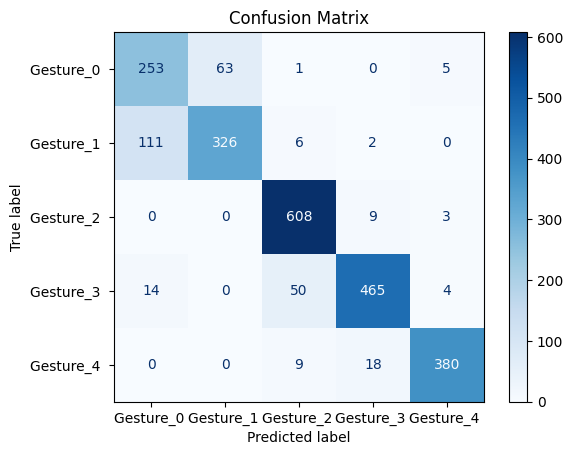

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
num_classes = 5
classes = [f'Gesture_{i} ' for i in range(num_classes)]
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred, average='weighted', zero_division=0)
precision = precision_score(y_valid, y_pred,average='weighted', zero_division=0)
recall = recall_score(y_valid, y_pred,average='weighted', zero_division=0)
class_report = classification_report(y_valid, y_pred, output_dict=True)
cm = confusion_matrix(y_valid, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", class_report)

display = ConfusionMatrixDisplay(cm, display_labels=classes)
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:


import torch
import torch.nn as nn
import torch.nn.functional as F
class hand_mlp(nn.Module):
  def __init__(self, input_size = 63, classes = 5):
    super(hand_mlp, self).__init__()
    self.fc1 = nn.Linear(input_size, 256)
    self.b1 = nn.BatchNorm1d(256)
    self.dropout1 = nn.Dropout(0.3)

    self.fc2 = nn.Linear(256, 128)
    self.b2 = nn.BatchNorm1d(128)
    self.dropout2 = nn.Dropout(0.3)

    self.fc3 = nn.Linear(256, 64)
    self.dropout3 = nn.Dropout(0.4)

    self.out = nn.Linear(128, classes)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = F.relu(self.fc2(x))
    x = self.dropout2(x)


    return self.out(x)


In [ ]:
train_loss , val_loss = [], []
best_val_loss = float('inf')
patience_counter = 0

In [ ]:
model = hand_mlp()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-4 )
num_epochs = 100

for epoch in range(num_epochs):
  model.train()
  training_loss = 0.0


  for inputs, labels in train_loader:
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    training_loss += loss.item()

  ave_loss_train = training_loss / len(train_loader)
  train_loss.append(ave_loss_train)

  model.eval()
  eval_loss = 0.0
  with torch.no_grad():
    for inputs, labels in valid_loader:
      output = model(inputs)
      loss = criterion(output, labels)
      eval_loss += loss.item()

  ave_loss_val = eval_loss / len(valid_loader)
  val_loss.append(ave_loss_val)

  print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {ave_loss_train:.4f} - Val Loss: {ave_loss_val:.4f}")


  if ave_loss_val < best_val_loss:
      best_val_loss = ave_loss_val
      patience_counter = 0
      torch.save(model.state_dict(), "best_model.pth")
  else:
      patience_counter += 1
      if patience_counter >= 5:
          print("Early stopping triggered.")
          break

Epoch 1/100 - Train Loss: 1.2515 - Val Loss: 0.8658
Epoch 2/100 - Train Loss: 0.8434 - Val Loss: 0.6317
Epoch 3/100 - Train Loss: 0.6573 - Val Loss: 0.4999
Epoch 4/100 - Train Loss: 0.5625 - Val Loss: 0.4419
Epoch 5/100 - Train Loss: 0.5120 - Val Loss: 0.3931
Epoch 6/100 - Train Loss: 0.4673 - Val Loss: 0.3747
Epoch 7/100 - Train Loss: 0.4466 - Val Loss: 0.3646
Epoch 8/100 - Train Loss: 0.4282 - Val Loss: 0.3435
Epoch 9/100 - Train Loss: 0.4162 - Val Loss: 0.3462
Epoch 10/100 - Train Loss: 0.4051 - Val Loss: 0.3307
Epoch 11/100 - Train Loss: 0.3891 - Val Loss: 0.3208
Epoch 12/100 - Train Loss: 0.3824 - Val Loss: 0.3509
Epoch 13/100 - Train Loss: 0.3783 - Val Loss: 0.3199
Epoch 14/100 - Train Loss: 0.3693 - Val Loss: 0.3250
Epoch 15/100 - Train Loss: 0.3666 - Val Loss: 0.3137
Epoch 16/100 - Train Loss: 0.3634 - Val Loss: 0.3229
Epoch 17/100 - Train Loss: 0.3594 - Val Loss: 0.3047
Epoch 18/100 - Train Loss: 0.3570 - Val Loss: 0.3002
Epoch 19/100 - Train Loss: 0.3483 - Val Loss: 0.3021
Ep

In [ ]:
def plot_losses(train_loss, val_loss_):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=list(range(len(train_loss))),
        y=train_loss,
        mode='lines+markers',
        name='Train Loss',
        line=dict(color='royalblue')
    ))
    fig.add_trace(go.Scatter(
        x=list(range(len(val_loss))),
        y=val_loss,
        mode='lines+markers',
        name='Validation Loss',
        line=dict(color='firebrick')
    ))

    fig.update_layout(
        title='Training vs Validation Loss',
        xaxis_title='Epochs',
        yaxis_title='Loss',
        template='plotly_white',
        hovermode='x unified'
    )
    fig.show()
plot_losses(train_loss, val_loss)

Accuracy: 0.8642
F1 Score: 0.8643
Precision: 0.8662
Recall: 0.8642

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       322
           1       0.78      0.71      0.74       445
           2       0.92      0.98      0.94       620
           3       0.93      0.91      0.92       533
           4       0.98      0.93      0.95       407

    accuracy                           0.86      2327
   macro avg       0.85      0.85      0.85      2327
weighted avg       0.87      0.86      0.86      2327



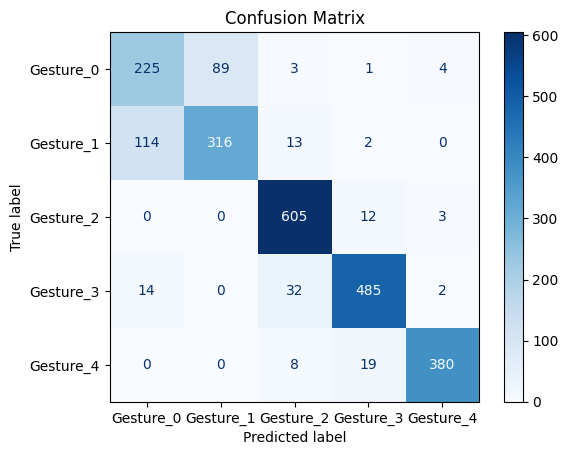

In [ ]:
y_pred = []
y_true = []
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
with torch.no_grad():
  for inputs, labels in valid_loader:
    output = model(inputs)
    preds = torch.argmax(output, dim=1)
    y_pred.extend(preds.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
num_classes = 5
classes = [f'Gesture_{i}' for i in range(num_classes)]

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
class_report = classification_report(y_true, y_pred, output_dict=True)
cm = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# results of the mlp model on validation set

In [ ]:
# finally i have used the svm model because it was light and had better result